In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import text_to_word_sequence

from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                   
import numpy as np    
%pip install plotly
import plotly.graph_objects as go
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
# Descargar la carpeta de dataset
import os
import platform
if os.access('./songs_dataset', os.F_OK) is False:
    if os.access('songs_dataset.zip', os.F_OK) is False:
        if platform.system() == 'Windows':
            !curl https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/datasets/songs_dataset.zip -o songs_dataset.zip
        else:
            !wget songs_dataset.zip https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/datasets/songs_dataset.zip
    !unzip -q songs_dataset.zip   
else:
    print("El dataset ya se encuentra descargado")

El dataset ya se encuentra descargado


In [31]:
os.listdir("./songs_dataset/")

['drake.txt',
 'lil-wayne.txt',
 'paul-simon.txt',
 'patti-smith.txt',
 'rihanna.txt',
 'britney-spears.txt',
 'lady-gaga.txt',
 'dr-seuss.txt',
 'notorious_big.txt',
 'lin-manuel-miranda.txt',
 'cake.txt',
 'jimi-hendrix.txt',
 'nursery_rhymes.txt',
 'bieber.txt',
 'blink-182.txt',
 'bjork.txt',
 'johnny-cash.txt',
 'beatles.txt',
 'joni-mitchell.txt',
 'kanye-west.txt',
 'dolly-parton.txt',
 'amy-winehouse.txt',
 'adele.txt',
 'al-green.txt',
 'notorious-big.txt',
 'eminem.txt',
 'r-kelly.txt',
 'Kanye_West.txt',
 'kanye.txt',
 'radiohead.txt',
 'dj-khaled.txt',
 'bob-dylan.txt',
 'ludacris.txt',
 'alicia-keys.txt',
 'dickinson.txt',
 'bruce-springsteen.txt',
 'nicki-minaj.txt',
 'missy-elliott.txt',
 'lorde.txt',
 'bob-marley.txt',
 'nickelback.txt',
 'prince.txt',
 'disney.txt',
 'leonard-cohen.txt',
 'Lil_Wayne.txt',
 'bruno-mars.txt',
 'michael-jackson.txt',
 'janisjoplin.txt',
 'nirvana.txt']

In [32]:
# Armar el dataset utilizando salto de línea para separar las oraciones/docs

df = pd.read_csv('songs_dataset/lady-gaga.txt', sep='/n', header=None)
df.head()

/tmp/ipykernel_9456/699152611.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,0
0,"I'll undress you, 'cause you're tired"
1,Cover you as you desire
2,When you fall asleep inside my arms
3,May not have the fancy things
4,But I'll give you everything


In [33]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 3807


In [44]:
sentence_tokens = [text_to_word_sequence(row[0]) for _, row in df.iterrows()]
sentence_tokens[:5]

[["i'll", 'undress', 'you', "'cause", "you're", 'tired'],
 ['cover', 'you', 'as', 'you', 'desire'],
 ['when', 'you', 'fall', 'asleep', 'inside', 'my', 'arms'],
 ['may', 'not', 'have', 'the', 'fancy', 'things'],
 ['but', "i'll", 'give', 'you', 'everything']]

In [45]:
from gensim.models.callbacks import CallbackAny2Vec
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [46]:
w2v_model = Word2Vec(min_count=5,    
                     window=2,      
                     vector_size=300,      
                     negative=20,    
                     workers=4,     
                     sg=1)       

In [47]:
w2v_model.build_vocab(sentence_tokens)

In [48]:
w2v_model.train(sentence_tokens,
                 total_examples=w2v_model.corpus_count,
                 epochs=20,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 74187.5
Loss after epoch 1: 52773.9609375
Loss after epoch 2: 50647.5703125
Loss after epoch 3: 50293.140625
Loss after epoch 4: 46611.640625
Loss after epoch 5: 43146.40625
Loss after epoch 6: 41910.65625
Loss after epoch 7: 39971.4375
Loss after epoch 8: 39264.6875
Loss after epoch 9: 37628.125
Loss after epoch 10: 36760.46875
Loss after epoch 11: 35257.65625
Loss after epoch 12: 34917.875
Loss after epoch 13: 33738.625
Loss after epoch 14: 33278.1875
Loss after epoch 15: 32882.0
Loss after epoch 16: 32333.25
Loss after epoch 17: 32615.6875
Loss after epoch 18: 32320.8125
Loss after epoch 19: 32560.5


(372246, 606000)

In [49]:
test_words = ["romance", "poker", "monster", "heart","party", "love"]

for w in test_words:
    print("\nWord:", w)
    print(w2v_model.wv.most_similar( w, topn=10))


Word: romance
[('caught', 0.8802815079689026), ('rah', 0.8627752661705017), ('meat', 0.8253868818283081), ('bad', 0.821631669998169), ('write', 0.8208560943603516), ('gun', 0.786299467086792), ('mi', 0.7794185280799866), ('may', 0.7461862564086914), ('revenge', 0.7277004718780518), ('king', 0.7212547063827515)]

Word: poker
[('paint', 0.915030837059021), ('p', 0.8641749620437622), ('read', 0.8626042008399963), ('1', 0.7997334599494934), ('face', 0.7838186621665955), ('l', 0.7651543617248535), ('wait', 0.7590113282203674), ('nobody', 0.7589481472969055), ('buy', 0.7516364455223083), ('hand', 0.7512826323509216)]

Word: monster
[('m', 0.9085986018180847), ('er', 0.9014573097229004), ('delicious', 0.8826960325241089), ('tree', 0.8587431311607361), ('christmas', 0.8301619291305542), ('has', 0.7958980202674866), ('marry', 0.7938559055328369), ('s', 0.7653913497924805), ('beating', 0.7539275288581848), ('telephone', 0.7498085498809814)]

Word: heart
[('ate', 0.7008843421936035), ('diamond',

In [50]:
existing = [w for w in test_words if w in w2v_model.wv.key_to_index]
vecs = np.array([w2v_model.wv[w] for w in existing])
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(vecs, vecs)
print("\nCosine similarity:")
print(pd.DataFrame(sim, index=existing, columns=existing))


Cosine similarity:
          romance     poker   monster     heart     party      love
romance  1.000000  0.356595  0.489128  0.313297  0.531116  0.488307
poker    0.356595  1.000000  0.484859  0.435140  0.572117  0.327225
monster  0.489128  0.484859  1.000000  0.423176  0.509471  0.394195
heart    0.313297  0.435140  0.423176  1.000000  0.450289  0.221596
party    0.531116  0.572117  0.509471  0.450289  1.000000  0.463782
love     0.488307  0.327225  0.394195  0.221596  0.463782  1.000000


In [51]:
def reduce_dimensions(model, num_dimensions = 2):
     
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

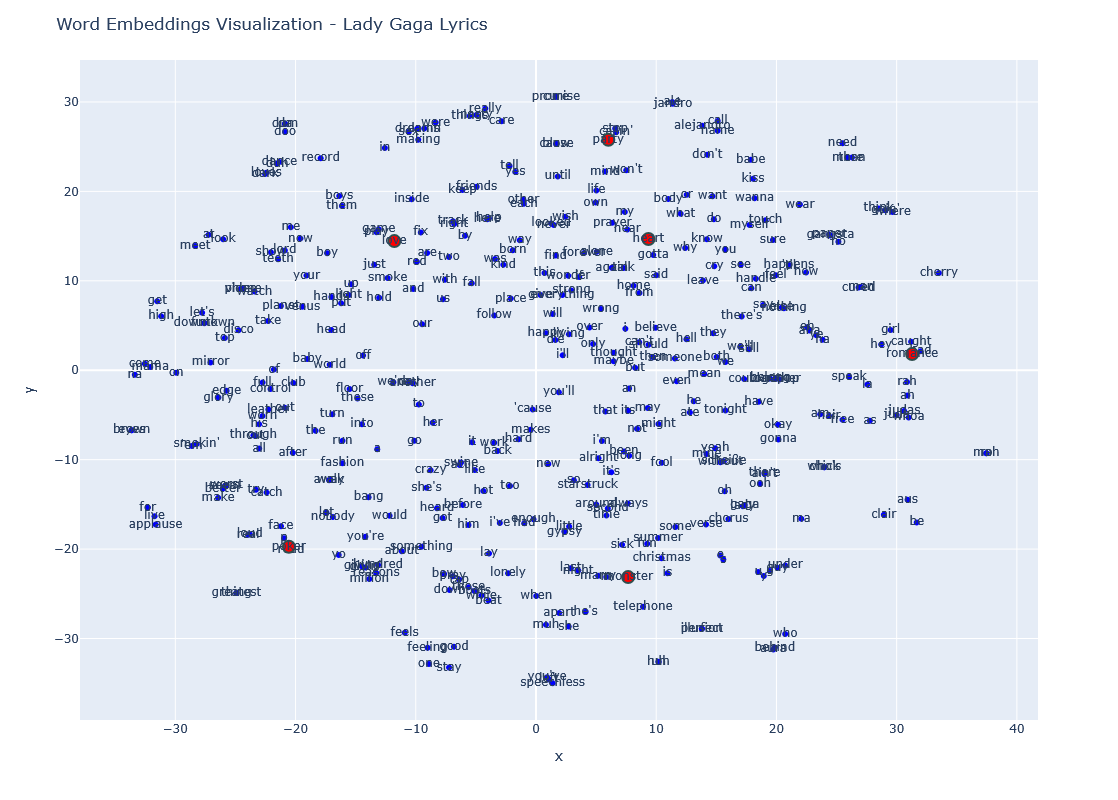

In [52]:
vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=400
colors = ['blue'] * MAX_WORDS

highlight_words = test_words

for i, word in enumerate(labels[:MAX_WORDS]):
    if word in highlight_words:
        colors[i] = 'red'

fig = px.scatter(
    x=vecs[:MAX_WORDS, 0], 
    y=vecs[:MAX_WORDS, 1], 
    text=labels[:MAX_WORDS],
    color=colors,
    color_discrete_map={'red': 'red', 'blue': 'blue'}
)

fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    title="Word Embeddings Visualization - Lady Gaga Lyrics",
    showlegend=False 
)

fig.update_traces(
    marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
    selector=dict(marker_color='red')
)

fig.show()

In [43]:
vecs, labels = reduce_dimensions(w2v_model, 3)

MAX_WORDS=400
colors = ['lightblue'] * MAX_WORDS
sizes = [2] * MAX_WORDS 

highlight_words = test_words

for i, word in enumerate(labels[:MAX_WORDS]):
    if word in highlight_words:
        colors[i] = 'red'
        sizes[i] = 8 
fig = px.scatter_3d(
    x=vecs[:MAX_WORDS, 0], 
    y=vecs[:MAX_WORDS, 1], 
    z=vecs[:MAX_WORDS, 2],
    text=labels[:MAX_WORDS],
    color=colors,
    size=sizes,
    color_discrete_map={'red': 'red', 'lightblue': 'lightblue'}
)

fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    title="3D Word Embeddings Visualization - Lady Gaga Lyrics",
    showlegend=False
)

fig.update_traces(
    marker=dict(line=dict(width=1, color='DarkSlateGrey')),
    selector=dict(marker_color='red')
)

fig.show(renderer="colab")

El modelo Word2Vec entrenado sobre letras de Lady Gaga logra capturar relaciones 
semánticas coherentes con el universo tematico de la artista.

Al ordenar por similitud puede se puede ver como se captura una relacion tematica entre los terminos.

Por ejemplo, las palabras mas relacionadas con "romance", no son palabras *semanticamente* similares sino que son
'caught','rah' y 'bad', debido al tema 'bad romance'

En el espacio de embeddings reducido a dos dimensiones,
los nombres propios y términos específicos de canciones tienden a ubicarse en la periferia, rodeados por palabras mas bien relacionads a esos temas. 
Por ejemplo, cerca del termino 'alejandro' se encuentran las palabras "dont't", "call" y "name" (ver imagen abajo)

Otro aspecto de la visualizacion es que al redcir a dos dimensiones, ciertas relaciones semanticas, menos relevantes que las tematicas, se pierden,
por ejemplo 'romance' y 'love' que semanticamente son similares (en la similaridad coseno, 0.5) en el plano se encuentran en extremos casi opuestos.

Esta relacion se recupera al pasar al grafico 3d, donde las dos palabras se ubican relativamente cercanas entre si 

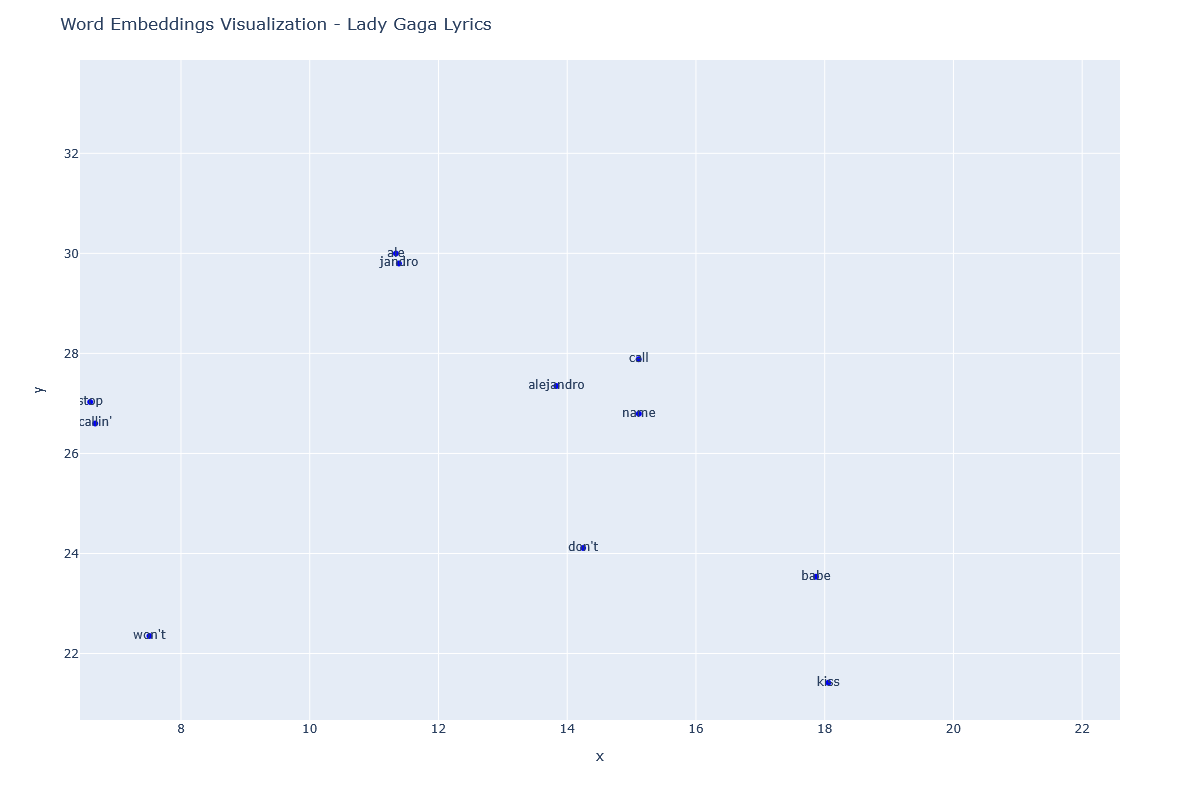